<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/neuro/NeuroIA/social_listening.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>
    <div align="center"> Recordá abrir en una nueva pestaña </div>

# Aprendizaje no supervisado para NLP en Twitter

## Clustering

*Clustering* significa **agrupar** en inglés, o **encontrar grupos**.

#### Modelo ejemplo: KMeans (clustering)

* Asignar centroides al azar
* Calcular qué punto pertenece a cada cluster
* Promediar todos los puntos en cada dimensión para recalcular el centroide
* Repetir hasta que los puntos dejen de cambiar de cluster.

<center><img src=https://github.com/institutohumai/cursos-python/raw/ml0/MachineLearning/media/image34.png width=500></center>

Ver animación en: 

https://stanford.edu/class/engr108/visualizations/kmeans/kmeans.html


## Reducción de dimensiones

## Ejemplo: PCA

La sigla *PCA* viene del inglés ["Principal Component Analysis"](https://en.wikipedia.org/wiki/Principal_component_analysis). La técnica consiste en, dada una cantidad de variables, encontrar **factores latentes** que explican los valores encontrados. 

Un ejemplo sencillo sería, dadas variables como "ingresos mensuales", "gastos mensuales", "gastos recreativos", "nivel educativo", "años de educación", encontrar un factor latente que **resume la correlación entre esas variables** y refleja algo que podemos llamar **estado socioeconómico**, por ejemplo.

## Ejemplo: NLP para Social Listening

## NLTK

La librería [Natural Languaje Toolkit](https://www.nltk.org/) es un *de facto* para NLP en Python para diversos idiomas. 

In [59]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

textos = ['Cello de madera', 'Dentífrico de Datos', 'Historia de la Mesopotamia']

vec = CountVectorizer()
X = vec.fit_transform(textos)
X

<3x8 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [61]:
X.todense()

matrix([[1, 0, 1, 0, 0, 0, 1, 0],
        [0, 1, 1, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 1, 0, 1]])

Podemos volcar este resultado en un `DataFrame`. Para obtener el encabezado de las columnas, vamos a utilizar el método `get_feature_names()`, propio del vectorizador.

In [62]:
import pandas as pd
pd.DataFrame(data = X.todense(), columns = vec.get_feature_names())

,cello,datos,de,dentífrico,historia,la,madera,mesopotamia
0,1,0,1,0,0,0,1,0
1,0,1,1,1,0,0,0,0
2,0,0,1,0,1,1,0,1


**Term frequency-inverse document frequency (TF–IDF)** es una técnica alternativa que computa la frecuencia relativa de cada palabra por documento, ponderada por la inversa de su frecuencia relativa a lo largo del *corpus* (colección de documentos). Este método funciona mejor con ciertos algoritmos de clasificación.

##### La variación **tf-idf** se calcula del siguiente modo:

tf-idf(t, d) = tf(t, d) * idf(t)

tf(t, d) es el valor que da CountVectorizer.

idf(t) es idf(t) = log [ n / df(t) ] + 1 , donde n es la cantidad total de documentos y df(t) es el número de documentos donde aparece t.

###### Cómo ejemplo, calculemos los valores de la primera fila:

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(textos)
pd.DataFrame(data = X.todense(), columns = vec.get_feature_names())

,cello,datos,de,dentífrico,historia,la,madera,mesopotamia
0,0.652491,0.000000,0.385372,0.000000,0.000000,0.000000,0.652491,0.000000
1,0.000000,0.652491,0.385372,0.652491,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.322745,0.000000,0.546454,0.546454,0.000000,0.546454


Aplicandolo con estilo a nuestro caso:

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

lemma = nltk.wordnet.WordNetLemmatizer()

class LemmaTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaTfidfVectorizer, self).build_analyzer()
        return lambda doc: [lemma.lemmatize(w) for w in analyzer(doc)]

In [65]:
%%time
vectorizer = LemmaTfidfVectorizer(stop_words='english')

X = vectorizer.fit_transform(tweets['tweet'])

CPU times: user 599 ms, sys: 867 µs, total: 600 ms
Wall time: 600 ms


In [66]:
X.shape

(14866, 9673)

In [70]:
vectorizer.get_feature_names()[100:110]

['abundantly',
 'abuse',
 'abusive',
 'academia',
 'academic',
 'academy',
 'acast',
 'accelerate',
 'accelerated',
 'accelerating']

### Topic modelling con K-Means 

In [93]:
import seaborn as sns
import numpy as np

Ejercicio:

- Ajustar KMeans a la matriz de features

In [71]:
from sklearn.cluster import KMeans
from sklearn import metrics

# Completar 
n_clusters = 9
km = KMeans(n_clusters=n_clusters, init='k-means++')
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [72]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, km.labels_, sample_size=1000))

Silhouette Coefficient: 0.012


In [73]:
centroides_ordenados = km.cluster_centers_.argsort()[:, ::-1]
vocab = vectorizer.get_feature_names()

for i in range(n_clusters):
    print("\nCluster número %d:" % i)
    for ind in centroides_ordenados[i, :10]:
        print('%s ' % vocab[ind], end='')


Cluster número 0:
need future way coronavirus people country year help make know 
Cluster número 1:
read million year future people day life time planet food 
Cluster número 2:
covid 19 pandemic vaccine know need world global recovery way 
Cluster número 3:
global economy crisis read learn leader economic emission warming world 
Cluster número 4:
world forum economic country read economy city largest biggest chart 
Cluster número 5:
change climate fight world need way tackle read learn help 
Cluster número 6:
best davos world country university city work way economy life 
Cluster número 7:
learn day future quote plastic waste world impact ocean food 
Cluster número 8:
new report read york zealand world book study join just 

Ejercicio:

 - Ajustar MiniBatchKMeans en lugar de KMeans
 - Encontrar el mejor número de clusters según el índice Silhouette

## Reducción de Dimensionalidad

Ejercicio:

- Reducir la matriz X (del TF-IDF Vectorizer) a 3 dimensiones con PCA

In [74]:
from sklearn.decomposition import PCA

# Completar
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(X.toarray())

In [75]:
reduced_features.shape

(14866, 3)

In [78]:
# Generamos una lista de colores
palette = sns.color_palette("GnBu_d", n_colors=max(km.labels_) + 1).as_hex()

In [79]:
# Armamos un DataFrame con la información para graficar
coords = pd.DataFrame(data = reduced_features, columns = ['x', 'y','z'], index = tweets['tweet'].index)
coords['text'] = tweets['tweet']
coords['color'] = [palette[i] for i in km.labels_]
coords['cluster'] = km.labels_

In [80]:
coords.sample(1)

,x,y,z,text,color,cluster
21901,-0.001613,-0.031181,-0.041595,Live now: How can we shift from technological ...,#9ed6be,0


In [81]:
coords = coords.sample(1000)

In [82]:
import plotly.graph_objects as go

fig = go.Figure()

for c in range(n_clusters):
  fig.add_trace(go.Scatter3d( x = coords[coords.cluster == c]['x'],
                                y = coords[coords.cluster == c]['y'],
                                z = coords[coords.cluster == c]['z'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(c), marker_color=palette[c], 
                                text=coords[coords.cluster == c]['text'], hoverinfo='text'))

fig.update_layout(width = 800, height = 800, autosize = True, showlegend = True)

## Herramienta interactiva

Con esta herramienta podemos buscar los últimos N tweets de un usuario O de un hashtag, ver en qué temas se agrupan.

Instrucciones:

- Darle play a la primera celda
- Resetear: en el menu, elegir Runtime -> Restart runtime
- Poner los parámetros que se quieran (usuario y cantidad de tweets) y ejecutar!

Aclaración: puede tardar unos ~2-5 minutos, en especial la primera vez que se ejecuta.)

In [ ]:
#@title Darle play a esta celda y cuando termina, clickear en el menú "Runtime" o "Entorno de Ejecución" y "Restart Runtime" o "Reiniciar entorno de ejecución"  
%%capture
# Instalamos twint para bajar tweets
!pip3 install --upgrade -e git+https://github.com/twintproject/twint.git@origin/master#egg=twint
!pip3 install --upgrade aiohttp_socks
!pip install tweet-preprocessor
!pip install umap-learn
!pip install sentence_transformers
!pip install hdbscan
!pip install transformers

In [ ]:
buscar_por = "usuario"  # @param ["usuario", "hashtag"]
usuario = "UniversidadC"  # @param {type:"string"}
hashtag = ""  # @param {type:"string"}
desde = "2019-01-01"  # @param {type:"date"}
desde = desde + ' 00:00:00'
idioma = "es"  # @param ["en", "es"]
n = 1000  # @param {type:"integer"}
download_csv = False  

if idioma == "es":
    sentiment_model = "mrm8488/distill-bert-base-spanish-wwm-cased-finetuned-spa-squad2-es"
elif idioma == "en":
    sentiment_model = "distilbert-base-uncased-finetuned-sst-2-english"
else:
    sentiment_model = "nlptown/bert-base-multilingual-uncased-sentiment"

import time
import re
import textwrap
import hdbscan
import nest_asyncio
import numpy as np
import seaborn as sns

# Hay que reiniciar la colab. Luego de eso, importamos
import twint
import umap
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import pandas as pd
import plotly.graph_objects as go
import preprocessor as p

from transformers import pipeline
from io import BytesIO
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import requests as rq
from PIL import Image
from wordcloud import STOPWORDS, ImageColorGenerator, WordCloud
from IPython.utils import io

nest_asyncio.apply()
pd.options.mode.chained_assignment = None
now = time.strftime("%Y-%m-%d %H:%M:%S")

def make_cloud(text, img_url=None, width=800, height=800, plot=True, min_font_size=10):
    mask = None

    if img_url:
        mask = np.array(Image.open(BytesIO(rq.get(img_url).content)))
        mask[mask > 250] = 255
        image_colors = ImageColorGenerator(mask)
        width = mask.shape[1]
        height = mask.shape[0]

    stopwords = set(STOPWORDS)

    wordcloud = WordCloud(
        width=width,
        height=height,
        background_color="white",
        stopwords=stopwords,
        random_state=42,
        min_font_size=min_font_size,
        mask=mask,
        color_func=image_colors if img_url else None,
    ).generate(text)

    if plot:
        plt.figure(figsize=(6, 6))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad=0)
        plt.show()

    return wordcloud

def c_tf_idf(documents, m, ngram_range=(1, 1), stop_words="spanish"):
    count = CountVectorizer(ngram_range=ngram_range, stop_words=stop_words).fit(
        documents
    )
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count


def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names()
    labels = list(docs_per_topic.cluster)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {
        label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1]
        for i, label in enumerate(labels)
    }
    return top_n_words


def plot_clusters(all_coords: pd.DataFrame, clusters):
    """all_coords should have title, text, cluster, and color cols. Constructed like:

    all_coords = pd.DataFrame(data = reduced, columns = ['x', 'y','z'])
    all_coords['title'] = labels
    all_coords['text'] = data
    all_coords['cluster'] = clusters"""
    fig = go.Figure()

    # Group titles and get top N words per cluster
    docs_per_topic = all_coords.groupby(["cluster"], as_index=False).agg(
        {"text": " ".join}
    )
    tf_idf, count = c_tf_idf(docs_per_topic.text.values, m=len(clusters), stop_words=[])
    top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=15)
    # pprint({k: [w for w,r in v] for k,v in top_n_words.items()}, compact=True)

    # @title 3D Plot
    max_labels = 3
    words_per_cluster = {
        n: [p for p, score in l[:max_labels]] for n, l in top_n_words.items()
    }

    # Clusters
    for c in np.unique(clusters):
        coords = all_coords[all_coords.cluster == c]
        fig.add_trace(
            go.Scatter3d(
                x=coords["x"],
                y=coords["y"],
                z=coords["z"],
                mode="markers",
                marker_size=8,
                marker_line_width=1,
                name=f"Cº{str(c)}: {'<br>'.join(textwrap.wrap(' '.join(words_per_cluster[c]), width=50))}",
                marker_color=coords["color"],
                text=coords["text"].apply(
                    lambda txt: "<br>".join(textwrap.wrap(txt, width=50))
                ),
                hoverinfo="text",
            )
        )
    return fig


def get_hashtag(hashtag, until=now, since=desde, n=None):
    c = twint.Config()
    c.Profile_full = True
    c.Pandas = True
    c.Search = hashtag
    c.Show_hashtags = True
    c.Until = until
    c.Since = since
    c.Count = True
    c.Retweets = True
    c.Hide_output = True
    if n:
        c.Limit = n

    c.Store_csv = True
    c.Output = until + " to " + since + ".csv"

    twint.run.Search(c)
    tweets = twint.output.panda.Tweets_df[["date", "tweet", "hashtags"]]
    return tweets


def get_user(user, until=now, since=desde, n=None):
    # Descargamos tweets
    c = twint.Config()
    c.Username = user
    c.Until = until
    c.Since = since
    c.Hide_output = True
    c.Pandas = True
    if n:
        c.Limit = n
    twint.run.Search(c)
    tweets = twint.output.panda.Tweets_df[["date", "tweet", "hashtags"]]
    return tweets

print("Descargando Tweets...")

if buscar_por == "usuario":
    func = get_user
    query = usuario
else:
    func = get_hashtag
    query = hashtag

tweets = func(query, n=n)
print(f'Got {tweets.shape[0]} tweets')
if download_csv:
    # Descargar csv a local
    tweets.to_csv(f"{user}.csv")
    from google.colab import files

    files.download(f"{user}.csv")
  

print("Despertando IAs...")
with io.capture_output() as captured:
    sentence_transformers_model = (
        "sentence-transformers/distilbert-multilingual-nli-stsb-quora-ranking"
    )
    model = SentenceTransformer(sentence_transformers_model)
    #get_sentiment = pipeline("sentiment-analysis", model=sentiment_model)

print("Procesando...")
tweets["tweet"] = tweets.apply(lambda x: p.clean(x["tweet"]), axis=1)

# Por tweets iguales con distintas URLs
tweets = tweets.drop_duplicates("tweet")
tweets = tweets.loc[(tweets["tweet"].str.len() > 1), :]

embeddings = model.encode(tweets["tweet"].tolist())
reducer = umap.UMAP(n_components=3).fit(embeddings)
umap_embeddings = reducer.transform(embeddings)
cluster = hdbscan.HDBSCAN().fit(umap_embeddings)

data = tweets["tweet"].tolist()
clusters = cluster.labels_

all_coords = pd.DataFrame(data=umap_embeddings, columns=["x", "y", "z"])
all_coords["text"] = data
all_coords["cluster"] = clusters

# for style in ['YlGnBu']:
style = "viridis_r"
# We generate a list of colors
palette = sns.color_palette(style, n_colors=len(np.unique(clusters)) + 1).as_hex()
all_coords["color"] = [palette[i] for i in clusters]

fig = plot_clusters(all_coords, clusters)
fig.update_layout(
    width=1000,
    height=800,
    autosize=False,
    showlegend=True,
    scene={"aspectmode": "cube"},
)
fig.show()

Descargando Tweets...
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
Got 243 tweets
Despertando IAs...
Procesando...


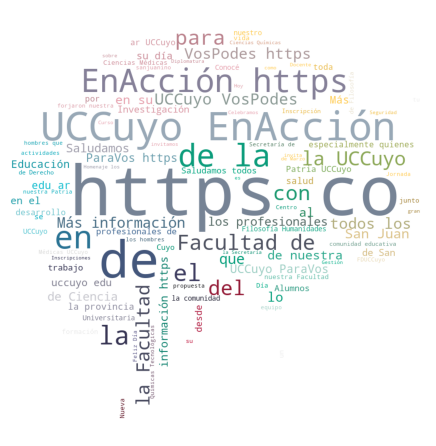

In [ ]:
#@title Word Cloud
img_url = "https://toppng.com/uploads/preview/human-brain-png-high-quality-image-brain-clipart-115630224411rqb2dvotv.png"
text = " ".join(twint.output.panda.Tweets_df["tweet"].tolist())
make_cloud(text, img_url);

In [ ]:
df = pd.read_csv('https://unket.s3-sa-east-1.amazonaws.com/data/tweets_uccuyo.csv')

In [ ]:
df.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1394679059943206915,1394679059943206915,1.621352e+12,2021-05-18 15:39:34,0,NaN,18 de Mayo 🏫Día Internacional de los Museos ...,es,"['uccuyo', 'paravos']",[],370129152,370129152,UniversidadC,Universidad Católica de Cuyo,2,15,https://twitter.com/UniversidadC/status/139467...,[],['https://pbs.twimg.com/media/E1rlNEqWEAozk6Y....,1,https://pbs.twimg.com/media/E1rlNEqWEAozk6Y.jpg,False,0,0,0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1394493325407932417,1394493325407932417,1.621308e+12,2021-05-18 03:21:31,0,NaN,🇦🇷¡Viva la Patria! #UCCuyo #ParaVos https://...,es,"['uccuyo', 'paravos']",[],370129152,370129152,UniversidadC,Universidad Católica de Cuyo,2,3,https://twitter.com/UniversidadC/status/139449...,[],['https://pbs.twimg.com/media/E1o8RqlXoAI8CP_....,1,https://pbs.twimg.com/media/E1o8RqlXoAI8CP_.jpg,False,0,0,0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1393584430590177280,1393584430590177280,1.621091e+12,2021-05-15 15:09:54,0,NaN,Hoy‼️ 👥🎶 Coro Universitario UCCuyo ¡Te espe...,es,"['uccuyo', 'paravos']",[],370129152,370129152,UniversidadC,Universidad Católica de Cuyo,6,15,https://twitter.com/UniversidadC/status/139358...,[],['https://pbs.twimg.com/media/E1cBpVXWYA0J6IV....,1,https://pbs.twimg.com/media/E1cBpVXWYA0J6IV.jpg,False,1,0,0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1392502685463715846,1392502685463715846,1.620833e+12,2021-05-12 15:31:26,0,NaN,👩🏻‍⚕️🩹👨🏽‍⚕️Feliz día a todos los profesionales...,es,"['uccuyo', 'paravos']",[],370129152,370129152,UniversidadC,Universidad Católica de Cuyo,3,15,https://twitter.com/UniversidadC/status/139250...,[],['https://pbs.twimg.com/media/E1MpzYeXMAEfM8E....,1,https://pbs.twimg.com/media/E1MpzYeXMAEfM8E.jpg,False,0,0,0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1392173708282933253,1392173708282933253,1.620755e+12,2021-05-11 17:44:12,0,NaN,🏥Desde la Facultad de Ciencias Medicas-UCCuyo ...,es,"['uccuyo', 'paravos']",[],370129152,370129152,UniversidadC,Universidad Católica de Cuyo,2,17,https://twitter.com/UniversidadC/status/139217...,['https://zoom.us/j/97080525865'],['https://pbs.twimg.com/media/E1H-maMWEAI42Ty....,1,https://pbs.twimg.com/media/E1H-maMWEAI42Ty.jpg,False,0,0,0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd

In [ ]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [ ]:
df.sample(2)

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
45,1335065090522050567,1335065090522050567,1.607139e+12,2020-12-05 03:34:56,0,NaN,"🙌 Las prácticas de compromiso social, como act...",es,"['uccuyo', 'enacción']",[],370129152,370129152,UniversidadC,Universidad Católica de Cuyo,6,3,https://twitter.com/UniversidadC/status/133506...,[],['https://pbs.twimg.com/media/Eocam1GW8AETF0s....,1,https://pbs.twimg.com/media/Eocam1GW8AETF0s.jpg,False,1,0,0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
112,1277617075113033730,1277617075113033730,1.593443e+12,2020-06-29 14:57:02,0,NaN,🧠⚖️Nueva propuesta de actualización junto a la...,es,"['uccuyo', 'enacción']",[],370129152,370129152,UniversidadC,Universidad Católica de Cuyo,1,14,https://twitter.com/UniversidadC/status/127761...,['https://forms.gle/Q9gvj97inAr9joQ2A'],['https://pbs.twimg.com/media/EbsB8FEXsAAKEoD....,1,https://pbs.twimg.com/media/EbsB8FEXsAAKEoD.jpg,False,0,0,0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
# La propiedad shape nos devuelve una tupla (filas,columnas)
df.shape

(163, 38)

In [ ]:
df['nlikes']

0      0
1      0
2      1
3      0
4      0
      ..
158    0
159    0
160    0
161    0
162    1
Name: nlikes, Length: 163, dtype: int64

In [ ]:
# Propiedades importantes de los dataframes
print('Columnas ', df.columns)
print('Index ', df.index)
print('Dimensiones ',df.shape)

Columnas  Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')
Index  RangeIndex(start=0, stop=163, step=1)
Dimensiones  (163, 38)


In [ ]:
# Consultar las primeras filas
df.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1394679059943206915,1394679059943206915,1.621352e+12,2021-05-18 15:39:34,0,NaN,18 de Mayo 🏫Día Internacional de los Museos ...,es,"['uccuyo', 'paravos']",[],370129152,370129152,UniversidadC,Universidad Católica de Cuyo,2,15,https://twitter.com/UniversidadC/status/139467...,[],['https://pbs.twimg.com/media/E1rlNEqWEAozk6Y....,1,https://pbs.twimg.com/media/E1rlNEqWEAozk6Y.jpg,False,0,0,0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1394493325407932417,1394493325407932417,1.621308e+12,2021-05-18 03:21:31,0,NaN,🇦🇷¡Viva la Patria! #UCCuyo #ParaVos https://...,es,"['uccuyo', 'paravos']",[],370129152,370129152,UniversidadC,Universidad Católica de Cuyo,2,3,https://twitter.com/UniversidadC/status/139449...,[],['https://pbs.twimg.com/media/E1o8RqlXoAI8CP_....,1,https://pbs.twimg.com/media/E1o8RqlXoAI8CP_.jpg,False,0,0,0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1393584430590177280,1393584430590177280,1.621091e+12,2021-05-15 15:09:54,0,NaN,Hoy‼️ 👥🎶 Coro Universitario UCCuyo ¡Te espe...,es,"['uccuyo', 'paravos']",[],370129152,370129152,UniversidadC,Universidad Católica de Cuyo,6,15,https://twitter.com/UniversidadC/status/139358...,[],['https://pbs.twimg.com/media/E1cBpVXWYA0J6IV....,1,https://pbs.twimg.com/media/E1cBpVXWYA0J6IV.jpg,False,1,0,0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1392502685463715846,1392502685463715846,1.620833e+12,2021-05-12 15:31:26,0,NaN,👩🏻‍⚕️🩹👨🏽‍⚕️Feliz día a todos los profesionales...,es,"['uccuyo', 'paravos']",[],370129152,370129152,UniversidadC,Universidad Católica de Cuyo,3,15,https://twitter.com/UniversidadC/status/139250...,[],['https://pbs.twimg.com/media/E1MpzYeXMAEfM8E....,1,https://pbs.twimg.com/media/E1MpzYeXMAEfM8E.jpg,False,0,0,0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1392173708282933253,1392173708282933253,1.620755e+12,2021-05-11 17:44:12,0,NaN,🏥Desde la Facultad de Ciencias Medicas-UCCuyo ...,es,"['uccuyo', 'paravos']",[],370129152,370129152,UniversidadC,Universidad Católica de Cuyo,2,17,https://twitter.com/UniversidadC/status/139217...,['https://zoom.us/j/97080525865'],['https://pbs.twimg.com/media/E1H-maMWEAI42Ty....,1,https://pbs.twimg.com/media/E1H-maMWEAI42Ty.jpg,False,0,0,0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


Si queremos extraer una serie del DataFrame, podemos hacerlo de la misma forma en que extraemos un valor de un diccionario.



In [ ]:
serie_mes = df['nlikes']

In [ ]:
serie_mes

0      0
1      0
2      1
3      0
4      0
      ..
158    0
159    0
160    0
161    0
162    1
Name: nlikes, Length: 163, dtype: int64

In [ ]:
type(serie_mes)

pandas.core.series.Series